# Wine Quality 

## Exploratory Data Analysis

## Data Source:  [link text](https://archive.ics.uci.edu/ml/datasets/wine+quality)


In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")

%matplotlib inline


In [260]:
white_wine = pd.read_csv("winequality-white.csv", sep=';')
red_wine = pd.read_csv("winequality-red.csv", sep=';')


In [261]:
print(white_wine.shape)
print(red_wine.shape)

(4898, 12)
(1599, 12)


In [262]:
#Display Column names, both wines have same column names
for col in white_wine.columns: 
    print(col) 

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [263]:
for col in red_wine.columns: 
    print(col) 

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [264]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [265]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [266]:
print('\nDatatype of white wine',white_wine.dtypes)

print("\n + '-'*60 + \n")

print('Datatype of red wine',red_wine.dtypes)


Datatype of white wine fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

 + '-'*60 + 

Datatype of red wine fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


# Feature extraction

* Store wine type as a feature

In [267]:
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'


In [268]:
print(white_wine.shape)
print(red_wine.shape)

(4898, 13)
(1599, 13)


In [269]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [270]:
red_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,red


## bucket wine quality scores into qualitative quality labels

In [271]:
# For red wine
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                           categories=['low', 'medium', 'high'])



# For white wine

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

In [272]:
print('Shape of red wine has now increased',red_wine.shape)
print('Shape of white wine has now increased',white_wine.shape)

Shape of red wine has now increased (1599, 14)
Shape of white wine has now increased (4898, 14)


In [273]:
#Now 14 features
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


## Merge red and white wine datasets

In [274]:
wines = pd.concat([red_wine, white_wine])

In [275]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [276]:
print('Datatype of white wine',wines.dtypes)

Datatype of white wine fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type                 object
quality_label           category
dtype: object


In [277]:
#wines.info()

wines.isnull().sum() # missing values? => this function is use to find out the missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
quality_label           0
dtype: int64

In [278]:
wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,medium
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white,medium


## re-shuffle records just to randomize data points

In [279]:
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True) # frac = 1 => means we are shuffling 100% of the rows.
                         #  reset_index = true means -> resetting the index of shuffled df and removes the old index
                        # if we set drop = true, the old index values will get added as a new column in the dataset
                  # random_state = is just a reference for our model's shuffling, if we share our model to a friend and if he uses reandom_stae = 41, 
                   # he will be getting a different test results, but he uses random_state = 42, he gets the same shuffle data and test results as well
print('Shape of merged dataset',wines.shape)


Shape of merged dataset (6497, 14)


## Understand dataset features and values

In [280]:
#print(white_wine.shape, red_wine.shape)
#print(wines.info())
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5,white,low
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,white,medium
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,white,low
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5,white,low


In [281]:
wines.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [282]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


# Exploratory Data Analysis and Visualizations

### Class imbalance

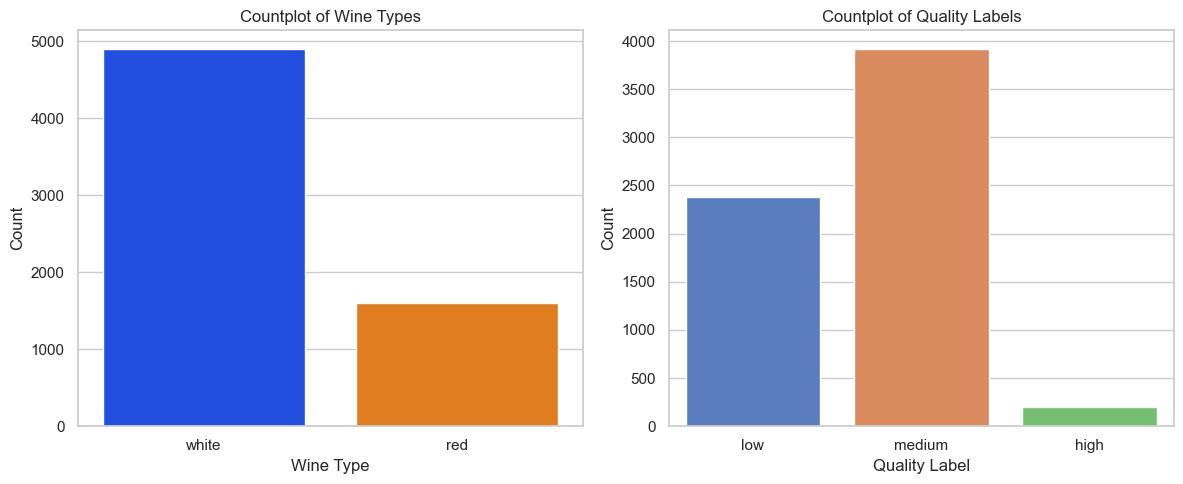

In [283]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Countplot for wine_type with hue set to the same variable
sns.countplot(data=wines, x="wine_type", hue="wine_type", palette="bright", legend=False, ax=axes[0]) # palette = deep, bright
axes[0].set_title("Countplot of Wine Types")
axes[0].set_xlabel("Wine Type")
axes[0].set_ylabel("Count")

# Countplot for quality_label with hue set to the same variable
sns.countplot(data=wines, x="quality_label", hue="quality_label", palette="muted", legend=False, ax=axes[1])
axes[1].set_title("Countplot of Quality Labels")
axes[1].set_xlabel("Quality Label")
axes[1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()  # constrained_layout
plt.show()

# Univariate Analysis

* Histogram of all features

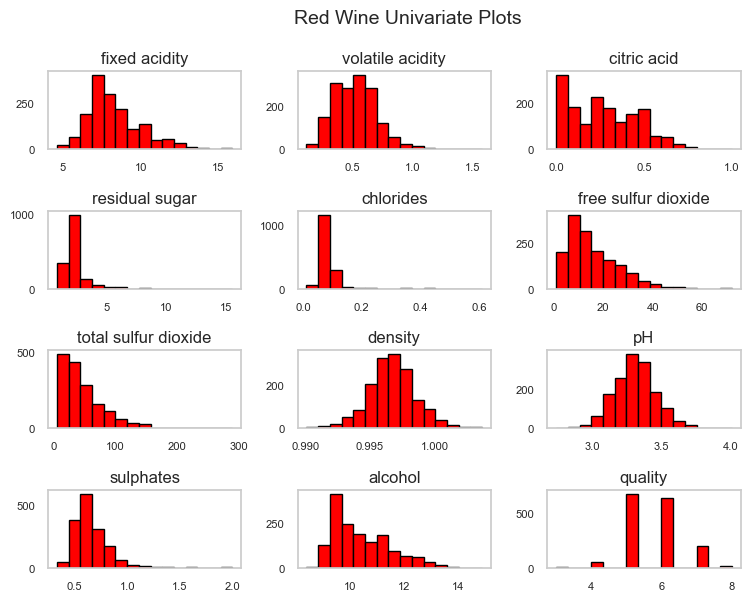

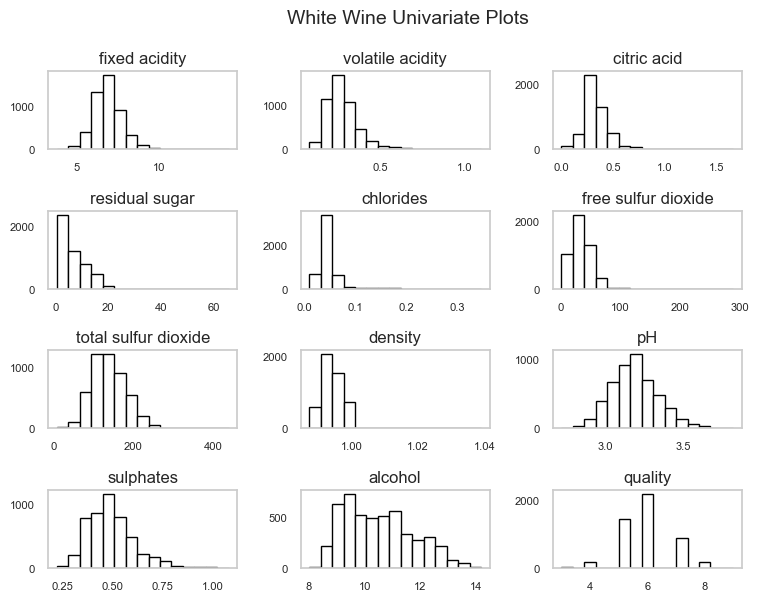

In [284]:
# Histogram for red wine
#red_wine['fixed acidity'].hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
            # xlabelsize=8, ylabelsize=8, grid=False)  

red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14)  

# Histogram for white wine
white_wine.hist(bins=15, color='white', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
wt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=14)   

plt.show()

# Boxplots

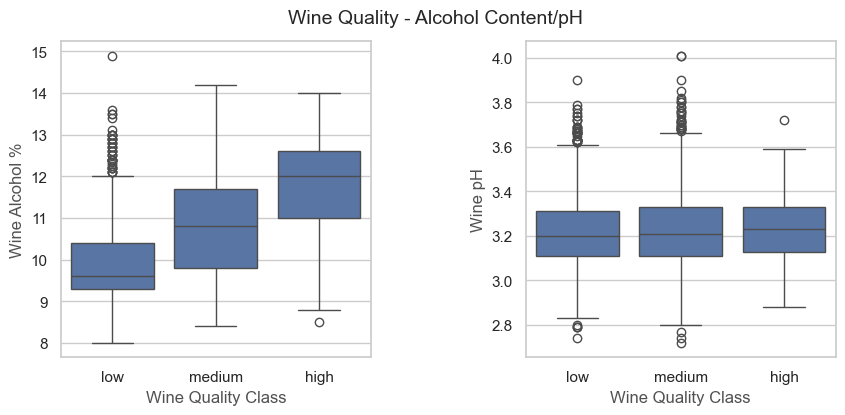

In [285]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))          # fig size => 10 inches wides and 4 inches tall
                                                             # f => overall figure; subplots => 1 row and 2 column
f.suptitle('Wine Quality - Alcohol Content/pH', fontsize=14)  
f.subplots_adjust(top=0.90, wspace=0.5)

sns.boxplot(x="quality_label", y="alcohol",
            data=wines, ax=ax1)
ax1.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="pH", data=wines, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine pH",size = 12,alpha=0.8)

plt.show()

In [286]:
Q1 = wines['alcohol'].quantile(0.25)
Q3 = wines['alcohol'].quantile(0.75)
IQR = Q3 - Q1
UCL = Q3 + 1.5 * IQR
LCL = Q1 - 1.5 * IQR
print(f"UCL: {UCL}, LCL: {LCL}")

UCL: 14.000000000000002, LCL: 6.799999999999999


# Data Overlap

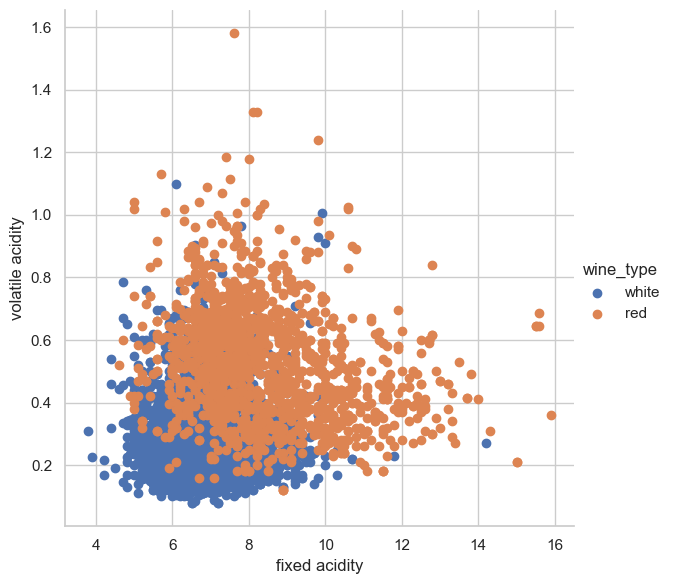

In [287]:
sns.set_style("whitegrid")

g = sns.FacetGrid(wines, hue="wine_type", height=6)
g.map(plt.scatter, 'fixed acidity', 'volatile acidity').add_legend()

plt.show()

In [288]:
!pip uninstall plotly -y

Found existing installation: plotly 6.5.0
Uninstalling plotly-6.5.0:
  Successfully uninstalled plotly-6.5.0


In [289]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
  Using cached plotly-6.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached plotly-6.5.0-py3-none-any.whl (9.9 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [290]:
import plotly.express as px

fig = px.scatter_3d(
    wines,
    x='alcohol',
    y='sulphates',
    z='volatile acidity',
    color='wine_type',
    symbol='wine_type',
    opacity=0.7,
    title='3D Scatter Plot: Wine Type Separation',
)




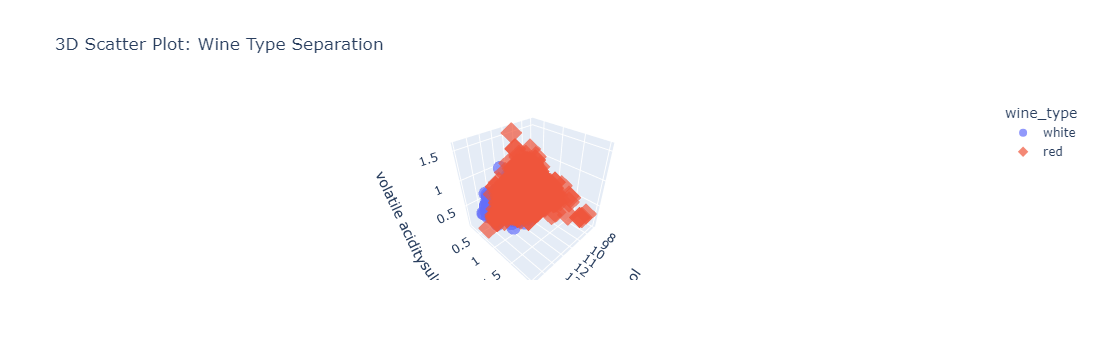

In [291]:
fig.show()

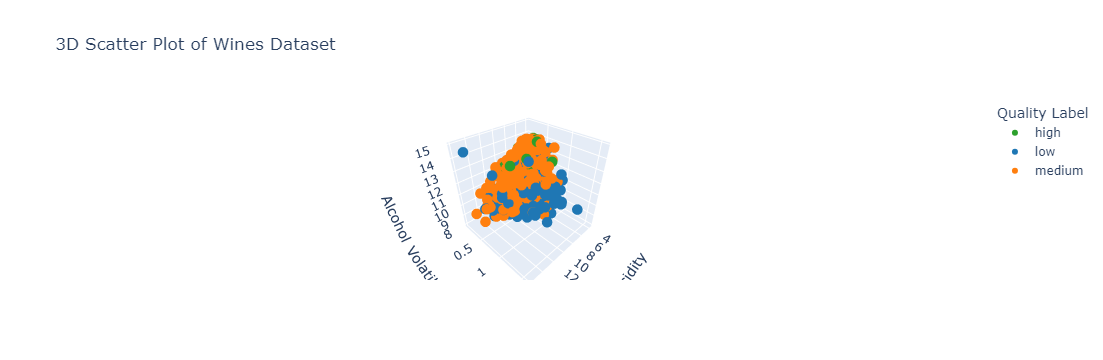

In [292]:

# 3D Scatter Plot with Plotly
fig = px.scatter_3d(
    wines,  # Use the correct DataFrame name
    x='fixed acidity',      # X-axis
    y='volatile acidity',   # Y-axis
    z='alcohol',            # Z-axis
    color='quality_label',  # Color by quality_label
    title='3D Scatter Plot of Wines Dataset',
    labels={
        'fixed acidity': 'Fixed Acidity',
        'volatile acidity': 'Volatile Acidity',
        'alcohol': 'Alcohol',
        'quality_label': 'Quality Label'
    },
    color_discrete_map={
        'low': '#1f77b4',    # Blue for low
        'medium': '#ff7f0e', # Orange for medium
        'high': '#2ca02c'    # Green for high
    }
)

# Adjust marker size
fig.update_traces(marker=dict(size=6))

# Show the plot
fig.show()


In [293]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score, roc_curve)
import joblib
RANDOM_STATE = 42

In [294]:
# Cell B: prepare features and label
# assumes 'wines' DataFrame exists (from your EDA cells)
df = wines.copy()

# If there are any non-feature columns left like index, drop them. Keep numeric features.
# First check columns:
print("Columns:", df.columns.tolist())

# Label encode 'wine_type'
le = LabelEncoder()
df['wine_label'] = le.fit_transform(df['wine_type'])  # e.g. 'red'->0, 'white'->1

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'wine_type', 'quality_label']


In [295]:
# Feature set: typically all numeric physico-chemical measurements (drop wine_type, wine_label if present)
#exclude = ['wine_type', 'wine_label']
#X = df.drop(columns=[c for c in exclude if c in df.columns])
# if there remain any non-numeric columns, drop or encode them:
#X = X.select_dtypes(include=[np.number])

#y = df['wine_label']

# Quick class balance
print("Class distribution:\n", y.value_counts(normalize=False))

Class distribution:
 wine_label
1    4898
0    1599
Name: count, dtype: int64


In [296]:
# SEPARATE FEATURES AND TARGET
# Features
X = df.drop(["wine_label", "quality", "quality_label", "wine_type" ], axis=1)

# Target
y = df["wine_label"]



# TRAIN–TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10, stratify=y
)

In [297]:
print(X.dtypes)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object


In [298]:
# IF WE NEED IMPUTATION we can do this

#imputer = SimpleImputer(strategy="median")
#X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
#X_test_imputed  = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Decision Tree

# Decision Tree

In [299]:
# DECISION TREE (TRAIN vs TEST)
dt = DecisionTreeClassifier(random_state=10)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt  = dt.predict(X_test)

print("\n--- Decision Tree ---")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_dt))
print("Test Accuracy :", accuracy_score(y_test, y_pred_test_dt))


--- Decision Tree ---
Train Accuracy: 0.9996151625938041
Test Accuracy : 0.9869230769230769


# K-Fold CV

Decision Tree CV scores: [0.98365385 0.98461538 0.98267565 0.98075072 0.98075072]
Mean CV accuracy: 0.9824892648256458


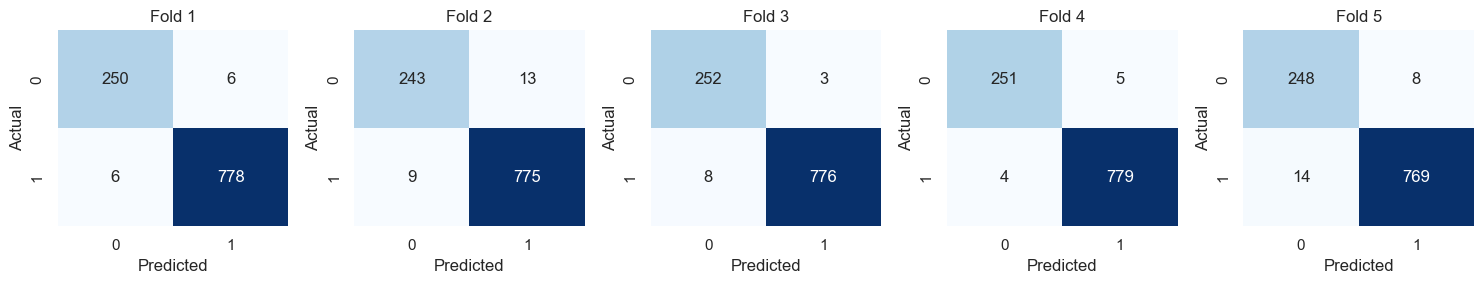

In [300]:
# DECISION TREE — CROSS VALIDATION
cv_scores = cross_val_score(DecisionTreeClassifier(random_state=10), X_train, y_train, cv=5)
print("Decision Tree CV scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


# STRATIFIED K-FOLD CONFUSION MATRICES
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
    X_tr, X_te = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

    dt = DecisionTreeClassifier(random_state=10)
    dt.fit(X_tr, y_tr)
    y_pred = dt.predict(X_te)

    cm = confusion_matrix(y_te, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i], cbar=False)
    axes[i].set_title(f"Fold {i+1}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Bagging or Bootstrap Aggreagation


--- Bagging Classifier ---
Train Accuracy: 0.9996151625938041
Test Accuracy : 0.9923076923076923
OOB Score     : 0.9926880892822783


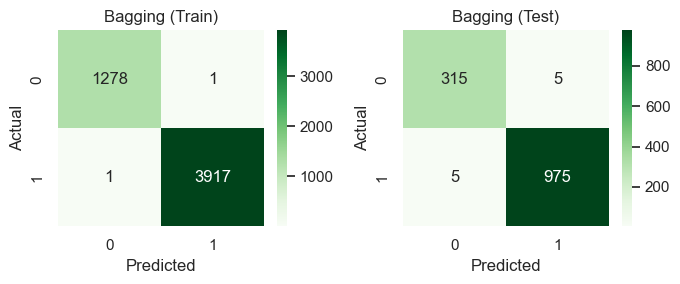

In [302]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

# BAGGING CLASSIFIER
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=10),
    n_estimators=50,
    random_state=10,
    oob_score=True
)

bag.fit(X_train, y_train)

# Predictions
y_pred_train_bag = bag.predict(X_train)
y_pred_test_bag  = bag.predict(X_test)

# Accuracy & OOB
print("\n--- Bagging Classifier ---")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_bag))
print("Test Accuracy :", accuracy_score(y_test, y_pred_test_bag))
print("OOB Score     :", bag.oob_score_)


# Confusion Matrices (Train vs Test)
fig, axes = plt.subplots(1, 2, figsize=(7,3))

sns.heatmap(confusion_matrix(y_train, y_pred_train_bag), annot=True, fmt="d", cmap="Greens", ax=axes[0])
axes[0].set_title("Bagging (Train)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_test_bag), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Bagging (Test)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


# ADABOOST CLASSIFIER


--- AdaBoost Classifier ---
Train Accuracy: 0.9930729266884741
Test Accuracy : 0.9923076923076923
OOB Score     : Not available for AdaBoost


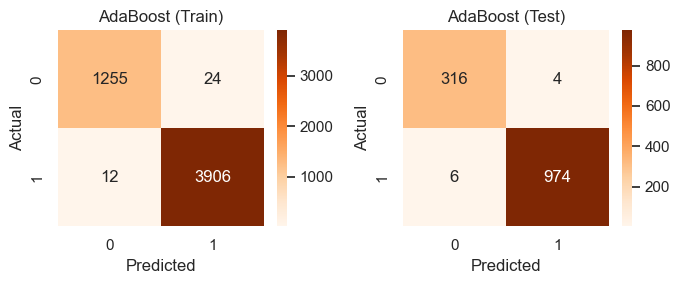

In [303]:
# ADABOOST CLASSIFIER

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=10),
    n_estimators=50,
    random_state=10
)
ada.fit(X_train, y_train)

# Predictions
y_pred_train_ada = ada.predict(X_train)
y_pred_test_ada  = ada.predict(X_test)

# Accuracy
print("\n--- AdaBoost Classifier ---")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_ada))
print("Test Accuracy :", accuracy_score(y_test, y_pred_test_ada))
print("OOB Score     : Not available for AdaBoost")


# Confusion Matrices (Train vs Test)
fig, axes = plt.subplots(1, 2, figsize=(7,3))

sns.heatmap(confusion_matrix(y_train, y_pred_train_ada), annot=True, fmt="d", cmap="Oranges", ax=axes[0])
axes[0].set_title("AdaBoost (Train)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_test_ada), annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("AdaBoost (Test)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


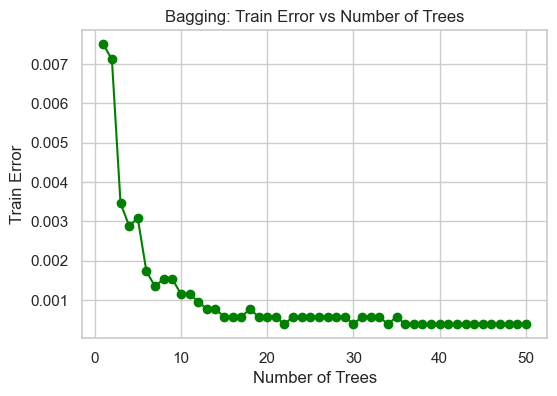

In [305]:
train_errors = []
for n in range(1, 51):
    bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=10),
        n_estimators=n,
        random_state=10,
        bootstrap=True
    )
    bag.fit(X_train, y_train)
    y_train_pred = bag.predict(X_train)
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))

plt.figure(figsize=(6,4))
plt.plot(range(1, 51), train_errors, marker='o', color='green')
plt.xlabel("Number of Trees")
plt.ylabel("Train Error")
plt.title("Bagging: Train Error vs Number of Trees")
plt.grid(True)
plt.show()


### AdaBoost: Train/Test Error vs Number of Estimators

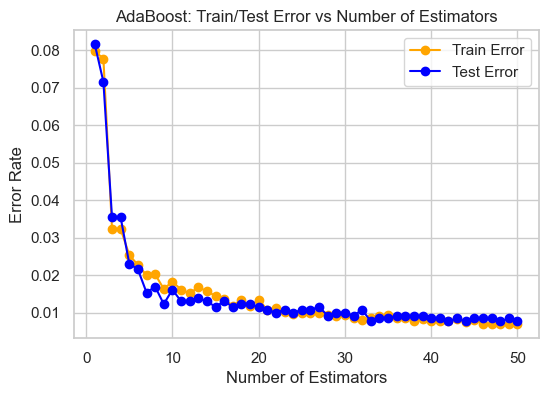

In [306]:
# ADABOOST: TRAIN & TEST ERROR OVER ESTIMATORS
train_errors = []
test_errors = []

for i, y_pred in enumerate(ada.staged_predict(X_train)):
    train_errors.append(1 - accuracy_score(y_train, y_pred))

for i, y_pred in enumerate(ada.staged_predict(X_test)):
    test_errors.append(1 - accuracy_score(y_test, y_pred))

plt.figure(figsize=(6,4))
plt.plot(range(1, len(train_errors)+1), train_errors, label='Train Error', marker='o', color='orange')
plt.plot(range(1, len(test_errors)+1), test_errors, label='Test Error', marker='o', color='blue')
plt.xlabel("Number of Estimators")
plt.ylabel("Error Rate")
plt.title("AdaBoost: Train/Test Error vs Number of Estimators")
plt.legend()
plt.grid(True)
plt.show()

In [308]:
models = ["Decision Tree", "Bagging", "AdaBoost"]

train_accuracies = [
    accuracy_score(y_train, y_pred_train_dt),
    accuracy_score(y_train, y_pred_train_bag),
    accuracy_score(y_train, y_pred_train_ada),
]

test_accuracies = [
    accuracy_score(y_test, y_pred_test_dt),
    accuracy_score(y_test, y_pred_test_bag),
    accuracy_score(y_test, y_pred_test_ada),
]


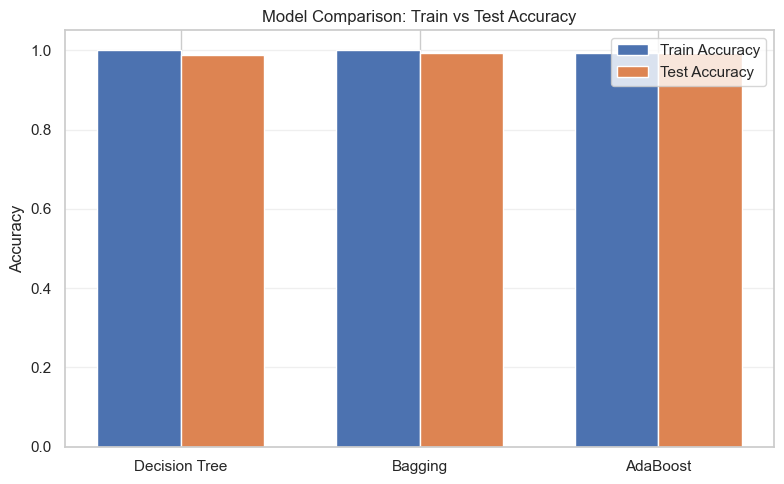

In [309]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8, 5))

plt.bar(x - width/2, train_accuracies, width, label="Train Accuracy")
plt.bar(x + width/2, test_accuracies,  width, label="Test Accuracy")

plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.title("Model Comparison: Train vs Test Accuracy")
plt.legend()
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()
